# Import

In [14]:
import pandas as pd
import numpy as np
import gc

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# EDA

### Data Load

In [2]:
# 데이터 분할(폴더) 구분
data_splits = ["train", "test"]

# 각 데이터 유형별 폴더명, 파일 접미사, 변수 접두어 설정
data_categories = {
    "회원정보": {"folder": "1.회원정보", "suffix": "회원정보", "var_prefix": "customer"},
    "신용정보": {"folder": "2.신용정보", "suffix": "신용정보", "var_prefix": "credit"},
    "승인매출정보": {"folder": "3.승인매출정보", "suffix": "승인매출정보", "var_prefix": "sales"},
    "청구정보": {"folder": "4.청구입금정보", "suffix": "청구정보", "var_prefix": "billing"},
    "잔액정보": {"folder": "5.잔액정보", "suffix": "잔액정보", "var_prefix": "balance"},
    "채널정보": {"folder": "6.채널정보", "suffix": "채널정보", "var_prefix": "channel"},
    "마케팅정보": {"folder": "7.마케팅정보", "suffix": "마케팅정보", "var_prefix": "marketing"},
    "성과정보": {"folder": "8.성과정보", "suffix": "성과정보", "var_prefix": "performance"}
}

# 2018년 7월부터 12월까지의 월 리스트
months = ['07', '08', '09', '10', '11', '12']

In [3]:
def dataLoad(data_splits: str, data_categories: dict, month: str):
    
    for category, info in data_categories.items():
        folder = info["folder"]
        suffix = info["suffix"]
        var_prefix = info["var_prefix"]
        
        # 파일명 형식: 2018{month}_{split}_{suffix}.parquet
        file_path = f"./datasets/{data_splits}/{folder}/2018{month}_{data_splits}_{suffix}.parquet"
        # 변수명 형식: {var_prefix}_{split}_{month}
        variable_name = f"{var_prefix}_{data_splits}_{month}"
        globals()[variable_name] = pd.read_parquet(file_path)
        print(f"{variable_name} is loaded from {file_path}")
    gc.collect()

## Customer Sheet

### 07월

In [7]:
dataLoad("train", data_categories, "07")
globals()['customer_train_07']

customer_train_07 is loaded from ./datasets/train/1.회원정보/201807_train_회원정보.parquet
credit_train_07 is loaded from ./datasets/train/2.신용정보/201807_train_신용정보.parquet
sales_train_07 is loaded from ./datasets/train/3.승인매출정보/201807_train_승인매출정보.parquet
billing_train_07 is loaded from ./datasets/train/4.청구입금정보/201807_train_청구정보.parquet
balance_train_07 is loaded from ./datasets/train/5.잔액정보/201807_train_잔액정보.parquet
channel_train_07 is loaded from ./datasets/train/6.채널정보/201807_train_채널정보.parquet
marketing_train_07 is loaded from ./datasets/train/7.마케팅정보/201807_train_마케팅정보.parquet
performance_train_07 is loaded from ./datasets/train/8.성과정보/201807_train_성과정보.parquet


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),22
1,201807,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),18
2,201807,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,20
3,201807,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),17
4,201807,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,34
399996,201807,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),19
399997,201807,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,13
399998,201807,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),22


In [25]:
globals()['customer_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 77 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                400000 non-null  int64  
 1   남녀구분코드              400000 non-null  int64  
 2   연령                  400000 non-null  object 
 3   Segment             400000 non-null  object 
 4   회원여부_이용가능           400000 non-null  int64  
 5   회원여부_이용가능_CA        400000 non-null  int64  
 6   회원여부_이용가능_카드론       400000 non-null  int64  
 7   소지여부_신용             400000 non-null  int64  
 8   소지카드수_유효_신용         400000 non-null  int64  
 9   소지카드수_이용가능_신용       400000 non-null  int64  
 10  입회일자_신용             400000 non-null  int64  
 11  입회경과개월수_신용          400000 non-null  int64  
 12  회원여부_연체             400000 non-null  int64  
 13  이용거절여부_카드론          400000 non-null  int64  
 14  동의여부_한도증액안내         400000 non-null  int64  
 15  수신거부여부_TM           400000 non-nul

In [23]:
globals()['customer_train_07'].drop(columns=['ID'], inplace=True)
string_col_names = ['연령', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M']
def change_df_type_str2int(df: pd.DataFrame, col: str):
    df[col] = df[col].astype(str).str.replace(r'[^0-9]', '', regex=True)
    return df

for col in string_col_names:
    globals()['customer_train_07'] = change_df_type_str2int(globals()['customer_train_07'], col)

# change target col to int
target_col = 'Segment'
le = LabelEncoder()
globals()['customer_train_07'][target_col] = le.fit_transform(globals()['customer_train_07'][target_col])

In [95]:
globals()['customer_train_07'].head()

,기준년월,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,소지카드수_이용가능_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201807,2,40,3,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,자녀성장(2),22
1,201807,1,30,4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,자녀성장(1),18
2,201807,1,30,2,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,자녀출산기,20
3,201807,2,40,3,1,1,0,1,2,2,...,0,0,0,0,0,0,0,1,자녀성장(2),17
4,201807,2,40,4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,자녀성장(1),15


In [96]:
globals()['customer_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 77 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   기준년월                400000 non-null  int64  
 1   남녀구분코드              400000 non-null  int64  
 2   연령                  400000 non-null  object 
 3   Segment             400000 non-null  int64  
 4   회원여부_이용가능           400000 non-null  int64  
 5   회원여부_이용가능_CA        400000 non-null  int64  
 6   회원여부_이용가능_카드론       400000 non-null  int64  
 7   소지여부_신용             400000 non-null  int64  
 8   소지카드수_유효_신용         400000 non-null  int64  
 9   소지카드수_이용가능_신용       400000 non-null  int64  
 10  입회일자_신용             400000 non-null  int64  
 11  입회경과개월수_신용          400000 non-null  int64  
 12  회원여부_연체             400000 non-null  int64  
 13  이용거절여부_카드론          400000 non-null  int64  
 14  동의여부_한도증액안내         400000 non-null  int64  
 15  수신거부여부_TM           400000 non-nul

In [131]:
def scan_col(df: pd.DataFrame):
    # dtype으로 숫자형 컬럼 추출
    number_cols = [col for col, dtype in df.dtypes.items() if dtype != 'object']
    
    # 결측치 확인.
    missing_value_cols = []
    for col_name, item in df[number_cols].isna().sum().items():
        if item != 0:
            missing_value_cols.append(col_name)
    number_cols = [x for x in number_cols if x not in missing_value_cols]

    # col value가 하나 -> corr()에서 NaN
    unique_value_cols = []
    for col in df.columns:
        if df[col].nunique() == 1:
            unique_value_cols.append(col)
    
    
    number_cols = [x for x in number_cols if x not in unique_value_cols]
    
    return number_cols, missing_value_cols, unique_value_cols
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['customer_train_07'])

In [132]:
len(number_cols), len(missing_value_cols), len(unique_value_cols)

(56, 3, 10)

In [133]:
unique_value_cols

['기준년월',
 '이용카드수_체크_가족',
 '이용금액_R3M_체크_가족',
 '연회비할인카드수_B0M',
 '할인금액_기본연회비_B0M',
 '할인금액_제휴연회비_B0M',
 '상품관련면제카드수_B0M',
 '임직원면제카드수_B0M',
 '우수회원면제카드수_B0M',
 '기타면제카드수_B0M']

In [134]:
missing_value_cols

['최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자']

In [135]:
len(number_cols)

56

In [136]:
globals()['customer_train_07'][number_cols].isna().sum().items()

In [137]:
def confusion_matrix_plot(df: pd.DataFrame, target_col: str, name:str):
    corr = df[number_cols].corr()
    corr = corr.mask(corr.abs() < 0.5, 0)
    corr.style.background_gradient(cmap='coolwarm').to_html(f'{name}_corr.html')
confusion_matrix_plot(globals()['customer_train_07'], number_cols, 'customer_train_07')

### 08월

In [138]:
dataLoad("train", data_categories, "08")
globals()['customer_train_08']

customer_train_08 is loaded from ./datasets/train/1.회원정보/201808_train_회원정보.parquet
credit_train_08 is loaded from ./datasets/train/2.신용정보/201808_train_신용정보.parquet
sales_train_08 is loaded from ./datasets/train/3.승인매출정보/201808_train_승인매출정보.parquet
billing_train_08 is loaded from ./datasets/train/4.청구입금정보/201808_train_청구정보.parquet
balance_train_08 is loaded from ./datasets/train/5.잔액정보/201808_train_잔액정보.parquet
channel_train_08 is loaded from ./datasets/train/6.채널정보/201808_train_채널정보.parquet
marketing_train_08 is loaded from ./datasets/train/7.마케팅정보/201808_train_마케팅정보.parquet
performance_train_08 is loaded from ./datasets/train/8.성과정보/201808_train_성과정보.parquet


,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201808,TRAIN_000000,2,40대,D,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),23
1,201808,TRAIN_000001,1,30대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
2,201808,TRAIN_000002,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,21
3,201808,TRAIN_000003,2,40대,D,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),18
4,201808,TRAIN_000004,2,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201808,TRAIN_399995,2,70대이상,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,노년생활,35
399996,201808,TRAIN_399996,2,50대,D,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),20
399997,201808,TRAIN_399997,1,30대,C,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,14
399998,201808,TRAIN_399998,1,40대,E,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),23


In [139]:
globals()['customer_train_08'][target_col] = le.transform(globals()['customer_train_08'][target_col])

In [140]:
globals()['customer_train_08'].head()

,기준년월,ID,남녀구분코드,연령,Segment,회원여부_이용가능,회원여부_이용가능_CA,회원여부_이용가능_카드론,소지여부_신용,소지카드수_유효_신용,...,할인금액_제휴연회비_B0M,청구금액_기본연회비_B0M,청구금액_제휴연회비_B0M,상품관련면제카드수_B0M,임직원면제카드수_B0M,우수회원면제카드수_B0M,기타면제카드수_B0M,카드신청건수,Life_Stage,최종카드발급경과월
0,201808,TRAIN_000000,2,40대,3,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(2),23
1,201808,TRAIN_000001,1,30대,4,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀성장(1),19
2,201808,TRAIN_000002,1,30대,2,1,1,0,1,1,...,0,0,0,0개,0개,0개,0개,0,자녀출산기,21
3,201808,TRAIN_000003,2,40대,3,1,1,0,1,2,...,0,0,0,0개,0개,0개,0개,1,자녀성장(2),18
4,201808,TRAIN_000004,2,40대,4,1,1,1,1,1,...,0,0,0,0개,0개,0개,0개,1,자녀성장(1),16


In [141]:
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['customer_train_08'])
confusion_matrix_plot(globals()['customer_train_08'], number_cols, 'customer_train_08')

### 비슷한 결향을 보이고 일부 특성 간 높은 상관 검출

높은 상관관계를 가진 변수쌍:
입회일자_신용: ['입회일자_신용', '입회경과개월수_신용']
입회경과개월수_신용: ['입회일자_신용', '입회경과개월수_신용']
수신거부여부_DM: ['수신거부여부_DM', '수신거부여부_메일']
수신거부여부_메일: ['수신거부여부_DM', '수신거부여부_메일']
유효카드수_신용체크: ['유효카드수_신용체크', '이용가능카드수_신용체크']
유효카드수_신용_가족: ['유효카드수_신용_가족', '이용가능카드수_신용_가족', '이용카드수_신용_가족', '이용금액_R3M_신용_가족']
유효카드수_체크: ['유효카드수_체크', '이용가능카드수_체크']
이용가능카드수_신용체크: ['유효카드수_신용체크', '이용가능카드수_신용체크']
이용가능카드수_신용_가족: ['유효카드수_신용_가족', '이용가능카드수_신용_가족', '이용카드수_신용_가족', '이용금액_R3M_신용_가족']
이용가능카드수_체크: ['유효카드수_체크', '이용가능카드수_체크']
이용카드수_신용체크: ['이용카드수_신용체크', '이용카드수_신용']
이용카드수_신용: ['이용카드수_신용체크', '이용카드수_신용']
이용카드수_신용_가족: ['유효카드수_신용_가족', '이용가능카드수_신용_가족', '이용카드수_신용_가족', '이용금액_R3M_신용_가족']
이용금액_R3M_신용체크: ['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액']
이용금액_R3M_신용: ['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액']
이용금액_R3M_신용_가족: ['유효카드수_신용_가족', '이용가능카드수_신용_가족', '이용카드수_신용_가족', '이용금액_R3M_신용_가족']
_1순위카드이용금액: ['이용금액_R3M_신용체크', '이용금액_R3M_신용', '_1순위카드이용금액']
_2순위카드이용금액: ['_2순위카드이용금액', '_2순위카드이용건수']
_2순위카드이용건수: ['_2순위카드이용금액', '_2순위카드이용건수']
보유여부_해외겸용_

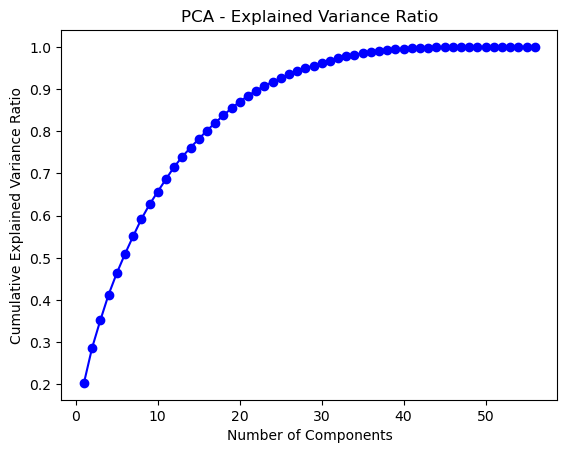

In [ ]:
# 1. 상관관계가 높은 변수 중 하나 선택
# 도메인 지식을 바탕으로 더 중요한 변수 선택
def dimension_reduction(df: pd.DataFrame, numeric_columns: list):
    correlation = df[numeric_columns].corr()
    high_correlation = correlation.mask(abs(correlation) <= 0.9, 0)
    
    print("높은 상관관계를 가진 변수쌍:")
    for col in high_correlation.columns:
        highly_corr = high_correlation[col][high_correlation[col] != 0]
        if len(highly_corr) > 1:  # 자기 자신 제외
            print(f"{col}: {highly_corr.index.tolist()}")


    # 2. PCA (Principal Component Analysis) 사용
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA

    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[numeric_columns])

    # PCA 적용
    pca = PCA()
    pca_data = pca.fit_transform(scaled_data)

    # 설명된 분산 비율 확인
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    pca.components_

    # 결과 시각화
    import matplotlib.pyplot as plt

    plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA - Explained Variance Ratio')
    plt.show()

# 차원 축소 65개 -> 30개 정도의 feature로도 충분히 기능할 것으로 예상.
dimension_reduction(globals()['customer_train_07'], number_cols)

## Credit Sheet

### 7월

In [144]:
globals()['credit_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 42 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   기준년월            400000 non-null  int64  
 1   ID              400000 non-null  object 
 2   최초한도금액          400000 non-null  int64  
 3   카드이용한도금액        400000 non-null  int64  
 4   CA한도금액          400000 non-null  int64  
 5   일시상환론한도금액       400000 non-null  int64  
 6   월상환론한도금액        400000 non-null  int64  
 7   CA이자율_할인전       400000 non-null  float64
 8   CL이자율_할인전       400000 non-null  float64
 9   RV일시불이자율_할인전    400000 non-null  float64
 10  RV현금서비스이자율_할인전  400000 non-null  float64
 11  RV신청일자          74921 non-null   float64
 12  RV약정청구율         400000 non-null  float64
 13  RV최소결제비율        400000 non-null  float64
 14  자발한도감액횟수_R12M   400000 non-null  object 
 15  자발한도감액금액_R12M   400000 non-null  int64  
 16  자발한도감액후경과월      400000 non-null  int64  
 17  강제한도감액횟수_R

In [151]:
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['credit_train_07'])
confusion_matrix_plot(globals()['credit_train_07'], number_cols, 'credit_train_07')

### 8월

In [147]:
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['credit_train_08'])
confusion_matrix_plot(globals()['credit_train_08'], number_cols, 'credit_train_08')

In [153]:
len(number_cols)

33

높은 상관관계를 가진 변수쌍:
카드이용한도금액: ['카드이용한도금액', 'CA한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M']
CA한도금액: ['카드이용한도금액', 'CA한도금액', '카드이용한도금액_B1M']
CA이자율_할인전: ['CA이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전']
RV일시불이자율_할인전: ['CA이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전']
RV현금서비스이자율_할인전: ['CA이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전']
RV약정청구율: ['RV약정청구율', 'rv최초시작후경과일']
상향가능한도금액: ['상향가능한도금액', '상향가능CA한도금액']
상향가능CA한도금액: ['상향가능한도금액', '상향가능CA한도금액']
카드이용한도금액_B1M: ['카드이용한도금액', 'CA한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M']
카드이용한도금액_B2M: ['카드이용한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M']
한도요청거절건수: ['한도요청거절건수', '한도심사거절후경과월']
한도심사거절후경과월: ['한도요청거절건수', '한도심사거절후경과월']
rv최초시작후경과일: ['RV약정청구율', 'rv최초시작후경과일']


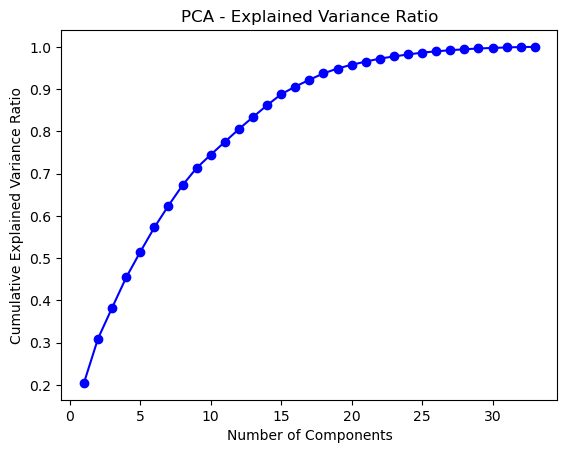

In [152]:
# 대략 33 -> 17정도
dimension_reduction(globals()['credit_train_07'], number_cols)

역시 거의 동일한 결과. 7월과 8월 사이 유의미한 차이는 없음.

## Sales

In [148]:
globals()['sales_train_07'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Columns: 406 entries, 기준년월 to 이용금액대
dtypes: float64(3), int64(385), object(18)
memory usage: 1.2+ GB


In [154]:
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['sales_train_07'])
confusion_matrix_plot(globals()['sales_train_07'], number_cols, 'sales_train_07')

In [150]:
number_cols, missing_value_cols, unique_value_cols = scan_col(globals()['sales_train_08'])
confusion_matrix_plot(globals()['sales_train_08'], number_cols, 'sales_train_08')

In [155]:
len(number_cols)

349

높은 상관관계를 가진 변수쌍:
최종이용일자_기본: ['최종이용일자_기본', '최종이용일자_신판', '최종이용일자_일시불']
최종이용일자_신판: ['최종이용일자_기본', '최종이용일자_신판', '최종이용일자_일시불']
최종이용일자_카드론: ['최종이용일자_카드론', '최초카드론이용경과월', '최종카드론이용경과월', '최종카드론_대출이율']
최종이용일자_일시불: ['최종이용일자_기본', '최종이용일자_신판', '최종이용일자_일시불']
이용건수_신용_B0M: ['이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용가맹점수', '이용건수_오프라인_R3M', '이용건수_오프라인_B0M']
이용건수_신판_B0M: ['이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용가맹점수', '이용건수_오프라인_R3M', '이용건수_오프라인_B0M']
이용건수_일시불_B0M: ['이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M', '이용건수_신용_R12M', '이용건수_신판_R12M', '이용건수_일시불_R12M', '이용건수_신용_R6M', '이용건수_신판_R6M', '이용건수_일시불_R6M', '이용건수_신용_R3M', '이용건수_신판_R3M', '이용건수_일시불_R3M', '이용가맹점수', '이용건수_오프라인_R3M', '이용건수_오프라인_B0M']
이용건수_할부_B0M: ['이용건수_할

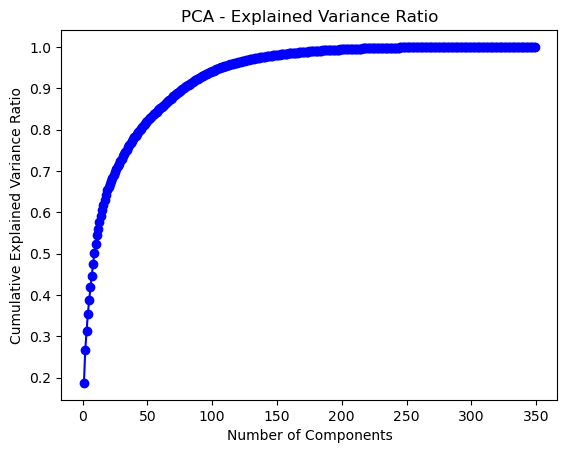

In [156]:
# 대략 349 -> 약 80~90개 정도
dimension_reduction(globals()['sales_train_07'], number_cols)

역시 7,8월 간 차이 발견되지 않음.

# Data Preprocessing(1) : Concat & Merge

In [3]:
# 데이터 유형별 설정 
info_categories = ["customer", "credit", "sales", "billing", "balance", "channel", "marketing", "performance"]

# 월 설정
months = ['07', '08', '09', '10', '11', '12']

In [4]:
#### Train ####

# 각 유형별로 월별 데이터를 합쳐서 새로운 변수에 저장
train_dfs = {}

for prefix in info_categories:
    # globals()에서 동적 변수명으로 데이터프레임들을 가져와 리스트에 저장
    df_list = [globals()[f"{prefix}_train_{month}"] for month in months]
    train_dfs[f"{prefix}_train_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_train_df is created with shape: {train_dfs[f'{prefix}_train_df'].shape}")


customer_train_df = train_dfs["customer_train_df"]
credit_train_df   = train_dfs["credit_train_df"]
sales_train_df    = train_dfs["sales_train_df"]
billing_train_df  = train_dfs["billing_train_df"]
balance_train_df  = train_dfs["balance_train_df"]
channel_train_df  = train_dfs["channel_train_df"]
marketing_train_df= train_dfs["marketing_train_df"]
performance_train_df = train_dfs["performance_train_df"]

gc.collect()

customer_train_df is created with shape: (2400000, 78)
credit_train_df is created with shape: (2400000, 42)
sales_train_df is created with shape: (2400000, 406)
billing_train_df is created with shape: (2400000, 46)
balance_train_df is created with shape: (2400000, 82)
channel_train_df is created with shape: (2400000, 105)
marketing_train_df is created with shape: (2400000, 64)
performance_train_df is created with shape: (2400000, 49)


0

In [5]:
#### Test ####

# test 데이터에 대해 train과 동일한 방법 적용
test_dfs = {}

for prefix in info_categories:
    df_list = [globals()[f"{prefix}_test_{month}"] for month in months]
    test_dfs[f"{prefix}_test_df"] = pd.concat(df_list, axis=0)
    gc.collect()
    print(f"{prefix}_test_df is created with shape: {test_dfs[f'{prefix}_test_df'].shape}")


customer_test_df = test_dfs["customer_test_df"]
credit_test_df   = test_dfs["credit_test_df"]
sales_test_df    = test_dfs["sales_test_df"]
billing_test_df  = test_dfs["billing_test_df"]
balance_test_df  = test_dfs["balance_test_df"]
channel_test_df  = test_dfs["channel_test_df"]
marketing_test_df= test_dfs["marketing_test_df"]
performance_test_df = test_dfs["performance_test_df"]

gc.collect()

customer_test_df is created with shape: (600000, 77)
credit_test_df is created with shape: (600000, 42)
sales_test_df is created with shape: (600000, 406)
billing_test_df is created with shape: (600000, 46)
balance_test_df is created with shape: (600000, 82)
channel_test_df is created with shape: (600000, 105)
marketing_test_df is created with shape: (600000, 64)
performance_test_df is created with shape: (600000, 49)


0

In [6]:
#### Train ####

train_df = customer_train_df.merge(credit_train_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: train_step1, shape:", train_df.shape)
del customer_train_df, credit_train_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_train_df",    "Step2"),
    ("billing_train_df",  "Step3"),
    ("balance_train_df",  "Step4"),
    ("channel_train_df",  "Step5"),
    ("marketing_train_df","Step6"),
    ("performance_train_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    train_df = train_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: train_{step}, shape:", train_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: train_step1, shape: (2400000, 118)
Step2 저장 완료: train_Step2, shape: (2400000, 522)


KeyboardInterrupt: 

In [12]:
#### Test ####

test_df = customer_test_df.merge(credit_test_df, on=['기준년월', 'ID'], how='left')
print("Step1 저장 완료: test_step1, shape:", test_df.shape)
del customer_test_df, credit_test_df
gc.collect()

# 이후 merge할 데이터프레임 이름과 단계 정보를 리스트에 저장
merge_list = [
    ("sales_test_df",    "Step2"),
    ("billing_test_df",  "Step3"),
    ("balance_test_df",  "Step4"),
    ("channel_test_df",  "Step5"),
    ("marketing_test_df","Step6"),
    ("performance_test_df", "최종")
]

# 나머지 단계 merge
for df_name, step in merge_list:
    # globals()로 동적 변수 접근하여 merge 수행
    test_df = test_df.merge(globals()[df_name], on=['기준년월', 'ID'], how='left')
    print(f"{step} 저장 완료: test_{step}, shape:", test_df.shape)
    # 사용한 변수는 메모리 해제를 위해 삭제
    del globals()[df_name]
    gc.collect()

Step1 저장 완료: test_step1, shape: (600000, 117)
Step2 저장 완료: test_Step2, shape: (600000, 521)
Step3 저장 완료: test_Step3, shape: (600000, 565)
Step4 저장 완료: test_Step4, shape: (600000, 645)
Step5 저장 완료: test_Step5, shape: (600000, 748)
Step6 저장 완료: test_Step6, shape: (600000, 810)
최종 저장 완료: test_최종, shape: (600000, 857)


### Data Preprocessing(2) : Encoding

In [13]:
feature_cols = [col for col in train_df.columns if col not in ["ID", "Segment"]]

X = train_df[feature_cols].copy()
y = train_df["Segment"].copy()

# 타깃 라벨 인코딩
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

In [14]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

X_test = test_df.copy()

encoders = {}  # 각 컬럼별 encoder 저장

for col in categorical_features:
    le_train = LabelEncoder()
    X[col] = le_train.fit_transform(X[col])
    encoders[col] = le_train
    unseen_labels_val = set(X_test[col]) - set(le_train.classes_)
    if unseen_labels_val:
        le_train.classes_ = np.append(le_train.classes_, list(unseen_labels_val))
    X_test[col] = le_train.transform(X_test[col])

In [15]:
gc.collect()

0

### Train

In [16]:
try:
    model = xgb.XGBClassifier(
        tree_method='gpu_hist',  # GPU 모드 설정
        gpu_id=0,
        random_state=42
    )
    print("GPU 사용 가능: gpu_hist 모드 적용")
    model.fit(X, y_encoded)
    
except Exception:
    model = xgb.XGBClassifier(
        random_state=42
    )
    print("GPU 사용 불가: CPU 모드 적용")
    model.fit(X, y_encoded)

GPU 사용 가능: gpu_hist 모드 적용


/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:10:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/common/error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/mldl/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:10:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


GPU 사용 불가: CPU 모드 적용


### Predict

In [17]:
X_test.drop(columns=['ID'],inplace=True)

In [18]:
# row-level 예측 수행
y_test_pred = model.predict(X_test)
# 예측 결과를 변환
y_test_pred_labels = le_target.inverse_transform(y_test_pred)

# row 단위 예측 결과를 test_data에 추가
test_data = test_df.copy()  # 원본 유지
test_data["pred_label"] = y_test_pred_labels

### Submission

In [19]:
submission = test_data.groupby("ID")["pred_label"] \
    .agg(lambda x: x.value_counts().idxmax()) \
    .reset_index()

submission.columns = ["ID", "Segment"]

In [20]:
submission.to_csv('./base_submit.csv',index=False)